In [1]:
#r2_score=0.7978
#by separating continues(standard scaling) and catagorical(label_encoding)
#then spliting and hence apply model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skn
import seaborn as sns

In [3]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [5]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [7]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
data=data.drop(['region'],axis=1)

In [9]:
data.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [10]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]


In [12]:
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [13]:
x1=x.drop(['sex','children','smoker'],axis=1)
x2=x.drop(['age','bmi'],axis=1)
x1.head()

,age,bmi
0,19,27.9
1,18,33.8
2,28,33.0
3,33,22.7
4,32,28.9


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x1)

In [15]:
x1=pd.DataFrame(x1)
x1=x1.rename(columns={0:'age',1:'bmi'})
x1.head()

,age,bmi
0,-1.438764,-0.453646
1,-1.509965,0.514186
2,-0.797954,0.382954
3,-0.441948,-1.306650
4,-0.513149,-0.289606


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [17]:
x2=x2.apply(label_encoder.fit_transform)
x2.head()

,sex,children,smoker
0,0,0,1
1,1,1,0
2,1,3,0
3,1,0,0
4,1,0,0


In [18]:
xx=pd.concat([x1,x2],axis=1)
xx.head()

,age,bmi,sex,children,smoker
0,-1.438764,-0.453646,0,0,1
1,-1.509965,0.514186,1,1,0
2,-0.797954,0.382954,1,3,0
3,-0.441948,-1.306650,1,0,0
4,-0.513149,-0.289606,1,0,0


In [19]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(xx,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
ypred=model.predict(xtest)


In [21]:
ypred

array([[ 1.14477697e+04],
       [ 9.94022880e+03],
       [ 3.77826896e+04],
       [ 1.59411450e+04],
       [ 6.90440139e+03],
       [ 3.60544781e+03],
       [ 1.12198567e+03],
       [ 1.40673310e+04],
       [ 8.76466428e+03],
       [ 7.24517282e+03],
       [ 4.15259080e+03],
       [ 1.01096978e+04],
       [ 9.08090014e+03],
       [ 4.30437472e+03],
       [ 2.76860405e+04],
       [ 1.11822766e+04],
       [ 1.11636807e+04],
       [ 5.55742337e+03],
       [ 8.02122268e+03],
       [ 2.66072057e+04],
       [ 3.34796572e+04],
       [ 1.40769317e+04],
       [ 1.12648940e+04],
       [ 3.25837142e+04],
       [ 4.52360871e+03],
       [ 8.62656455e+03],
       [ 7.84514814e+02],
       [ 1.01726082e+04],
       [ 4.24356992e+03],
       [ 1.01905987e+04],
       [ 8.79339433e+03],
       [ 4.03161609e+04],
       [ 1.58753231e+04],
       [ 1.40587692e+04],
       [ 2.43789694e+04],
       [ 4.69428866e+03],
       [ 1.29152795e+04],
       [ 3.09059547e+04],
       [ 3.3

In [22]:
ypred1=model.predict([[-1.5099,0.5096,1,1,0]])
ypred1

array([[3926.25806975]])

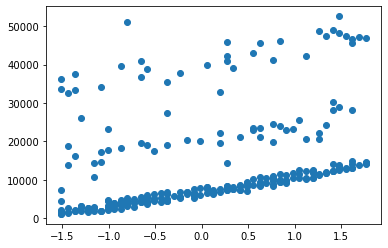

In [23]:
plt.scatter(xtest['age'],ytest)


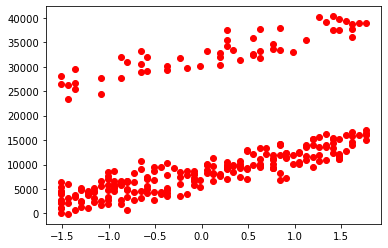

In [24]:
plt.scatter(xtest['age'],ypred,c='red')

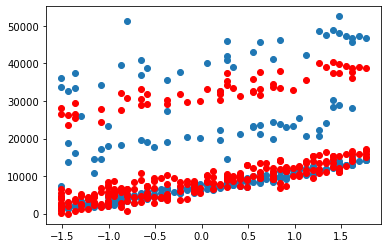

In [25]:
plt.scatter(xtest['age'],ytest)

plt.scatter(xtest['age'],ypred,c='red')

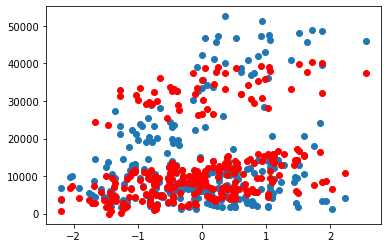

In [26]:
plt.scatter(xtest['bmi'],ytest)

plt.scatter(xtest['bmi'],ypred,c='red')

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7978966946106112

In [28]:
ytest.head()

,expenses
578,9724.53
610,8547.69
569,45702.02
1034,12950.07
198,9644.25


In [29]:
ypred

array([[ 1.14477697e+04],
       [ 9.94022880e+03],
       [ 3.77826896e+04],
       [ 1.59411450e+04],
       [ 6.90440139e+03],
       [ 3.60544781e+03],
       [ 1.12198567e+03],
       [ 1.40673310e+04],
       [ 8.76466428e+03],
       [ 7.24517282e+03],
       [ 4.15259080e+03],
       [ 1.01096978e+04],
       [ 9.08090014e+03],
       [ 4.30437472e+03],
       [ 2.76860405e+04],
       [ 1.11822766e+04],
       [ 1.11636807e+04],
       [ 5.55742337e+03],
       [ 8.02122268e+03],
       [ 2.66072057e+04],
       [ 3.34796572e+04],
       [ 1.40769317e+04],
       [ 1.12648940e+04],
       [ 3.25837142e+04],
       [ 4.52360871e+03],
       [ 8.62656455e+03],
       [ 7.84514814e+02],
       [ 1.01726082e+04],
       [ 4.24356992e+03],
       [ 1.01905987e+04],
       [ 8.79339433e+03],
       [ 4.03161609e+04],
       [ 1.58753231e+04],
       [ 1.40587692e+04],
       [ 2.43789694e+04],
       [ 4.69428866e+03],
       [ 1.29152795e+04],
       [ 3.09059547e+04],
       [ 3.3